In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load dataset from uploaded CSV file
df = pd.read_csv("customer_churn_dataset.csv")


In [33]:
# Check the column names
print(df.columns)

Index(['CustomerID', 'Tenure', 'LastRechargeDays', 'ContractType', 'plan_type',
       'Churn', 'Feedback'],
      dtype='object')


In [34]:
# Convert 'LastRechargeDays' to datetime
df["LastRechargeDays"] = pd.to_datetime(df["LastRechargeDays"])

# Handling missing values (filling with median)
df["Tenure"].fillna(df["Tenure"].median(), inplace=True)
df["LastRechargeDays"].fillna(df["LastRechargeDays"].median(), inplace=True)

# Display the output
print("Updated 'Tenure' column:")
print(df["Tenure"].head())

print("\nUpdated 'LastRechargeDays' column:")
print(df["LastRechargeDays"].head())

Updated 'Tenure' column:
0    38.0
1    51.0
2    31.0
3    14.0
4    42.0
Name: Tenure, dtype: float64

Updated 'LastRechargeDays' column:
0   2023-01-01 00:00:00
1   2023-01-02 00:00:00
2   2023-01-03 00:00:00
3   2024-05-15 12:00:00
4   2024-05-15 12:00:00
Name: LastRechargeDays, dtype: datetime64[ns]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21216\1468082178.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tenure"].fillna(df["Tenure"].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21216\1468082178.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [35]:
# Calculate the difference in days between the current date and the "LastRechargeDays" column
df["DaysSinceLastRecharge"] = (pd.Timestamp.now() - df["LastRechargeDays"]).dt.days


# Filter the DataFrame based on the calculated difference
df_filtered = df[df["DaysSinceLastRecharge"] <= 180]

# Display the filtered output
print("\nFiltered DataFrame (users with last recharge <= 180 days):")
print(df_filtered.head())


Filtered DataFrame (users with last recharge <= 180 days):
     CustomerID  Tenure LastRechargeDays ContractType plan_type  Churn  \
601         602    50.0       2024-08-24     Retained  Postpaid      0   
602         603    36.0       2024-08-25      Churned  Postpaid      0   
603         604    21.0       2024-08-26     Retained   Prepaid      1   
604         605    56.0       2024-08-27     Retained  Postpaid      0   
605         606    28.0       2024-08-28     Retained  Postpaid      0   

                        Feedback  DaysSinceLastRecharge  
601  Not satisfied with the plan                    180  
602  Not satisfied with the plan                    179  
603               Network issues                    178  
604           No specific reason                    177  
605  Not satisfied with the plan                    176  


In [36]:
# Statistical summarization (churn rate per plan)
churn_rate_per_plan = df_filtered.groupby("plan_type")["Churn"].mean()

# Display the churn rate per plan
print("Churn Rate per Plan:")
print(churn_rate_per_plan)

Churn Rate per Plan:
plan_type
Postpaid    0.199005
Prepaid     0.248677
Name: Churn, dtype: float64


In [37]:
# Categorical analysis (churn by contract type)
churn_rate_by_contract = df_filtered.groupby("ContractType")["Churn"].mean()

# Display the churn rate by contract type
print("\nChurn Rate by Contract Type:")
print(churn_rate_by_contract)


Churn Rate by Contract Type:
ContractType
Churned     0.260870
Retained    0.207273
Name: Churn, dtype: float64


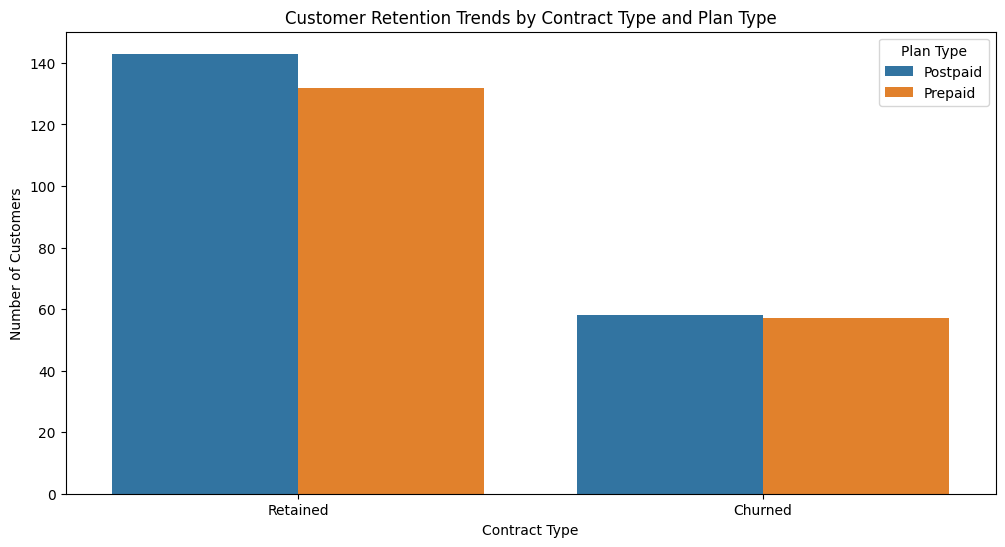

In [38]:
# Data visualization (customer retention trends)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='ContractType', hue='plan_type')
plt.title('Customer Retention Trends by Contract Type and Plan Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Plan Type')
plt.show()

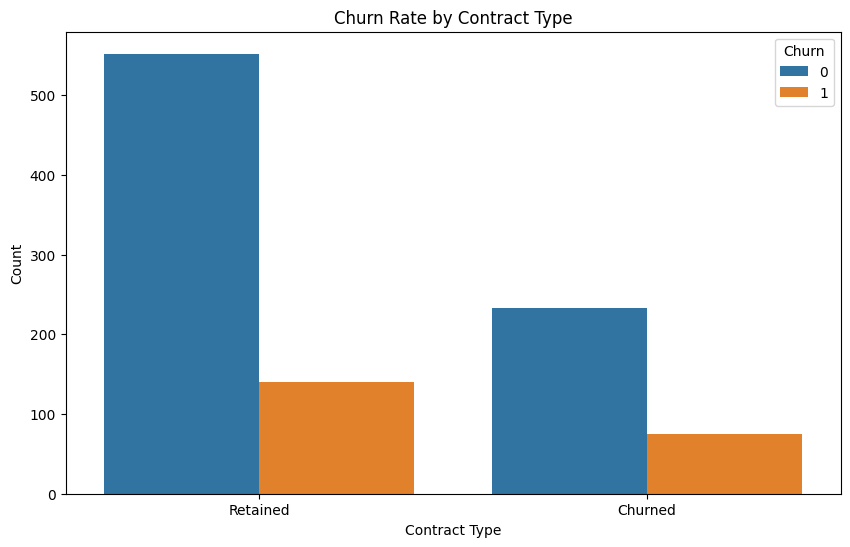

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ContractType', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

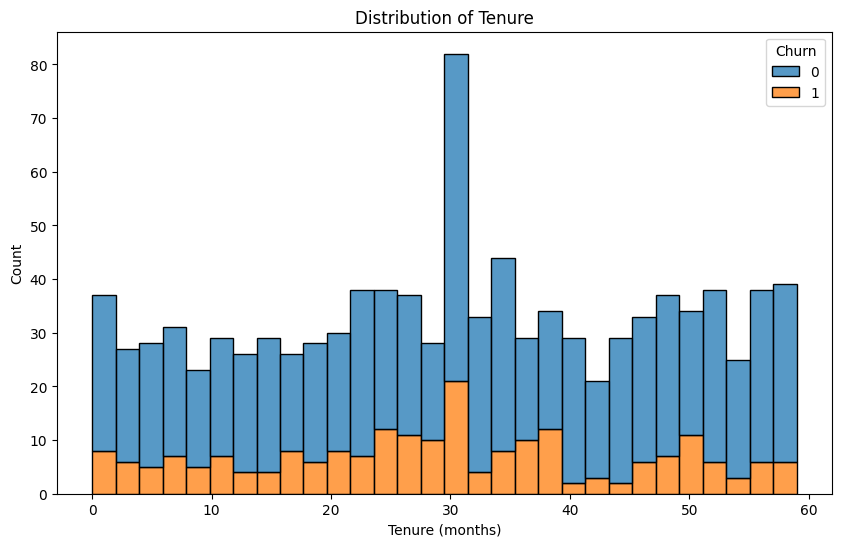

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

In [41]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix['Churn'].sort_values(ascending=False))

Churn                    1.000000
CustomerID               0.023108
DaysSinceLastRecharge   -0.023717
Tenure                  -0.040123
Name: Churn, dtype: float64


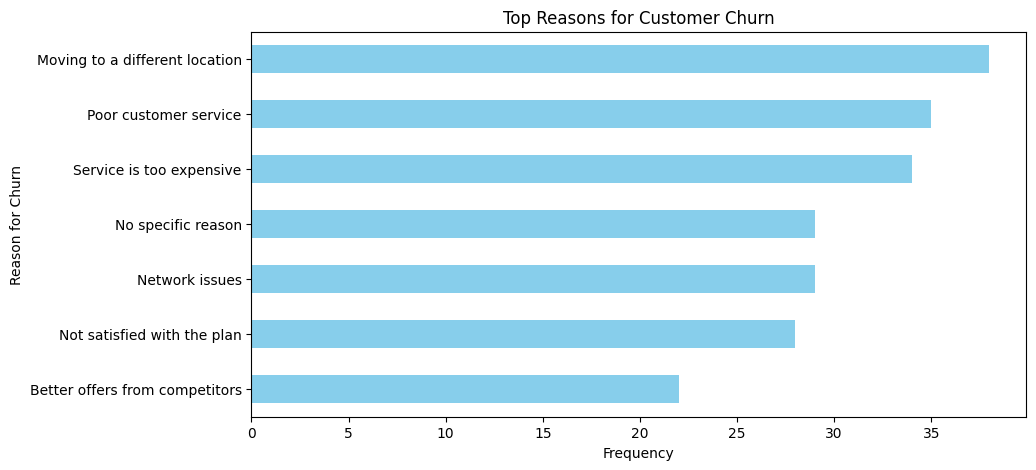

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
# Extract feedback from churned customers
feedback = df[df['Churn'] == 1]['Feedback'].dropna()

# Count occurrences of full phrases
feedback_counts = feedback.value_counts()

# Plot bar chart for the top feedback reasons
plt.figure(figsize=(10, 5))
feedback_counts.plot(kind='barh', color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Reason for Churn")
plt.title("Top Reasons for Customer Churn")
plt.gca().invert_yaxis()  # Show highest count on top
plt.show()